In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('study_performance.csv', sep=",")

In [5]:
data.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [6]:
data.shape

(1000, 8)

#### Пол, раса, уровень образования родителей, ланч, курс подготовки к тестам

In [7]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [19]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
if not data.isnull().values.any():
    print("В датасете нет пустых (null или undefined) значений")

В датасете нет пустых (null или undefined) значений


#### Описание датасета

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Основные статистические характеристки набора данных

In [15]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Определим уникальные значения для целевого признака

In [24]:
data['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

#### Гистограммы для int признаков

array([[<AxesSubplot: title={'center': 'math_score'}>,
        <AxesSubplot: title={'center': 'reading_score'}>],
       [<AxesSubplot: title={'center': 'writing_score'}>,
        <AxesSubplot: >]], dtype=object)

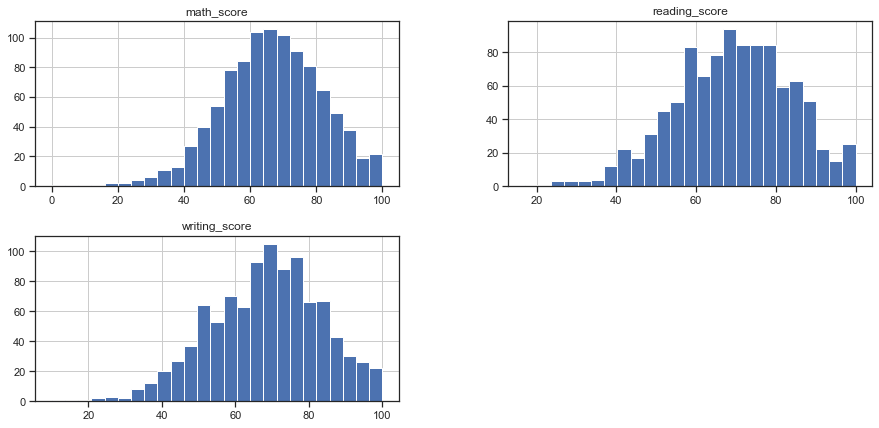

In [28]:
data.hist(bins=25, figsize = (15,7))

#### Диаграммы рассеяние для всех признаков

<Figure size 864x432 with 0 Axes>

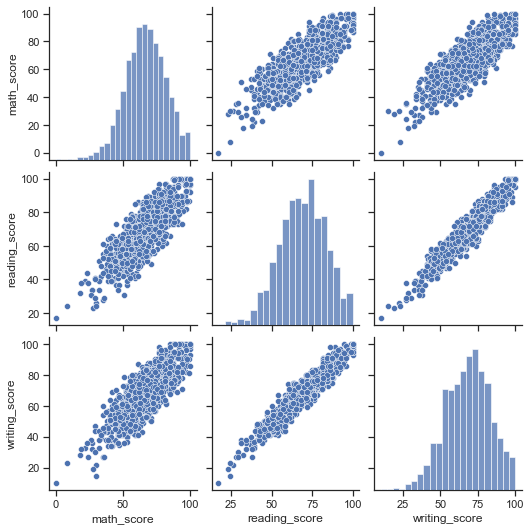

In [30]:
plt.figure(figsize=(12,6))
sns.pairplot(data)

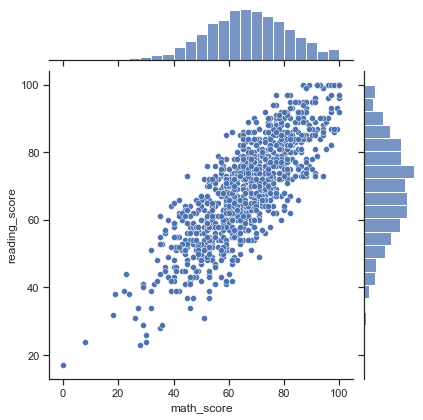

In [37]:
sns.jointplot(x = "math_score", y = "reading_score", kind="scatter", data = data)

<AxesSubplot: xlabel='writing_score'>

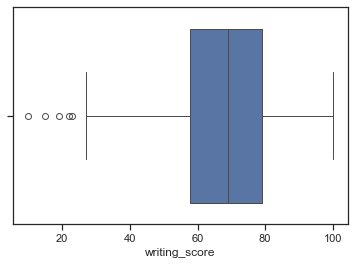

In [39]:
sns.boxplot(x=data['writing_score'])

<AxesSubplot: xlabel='math_score'>

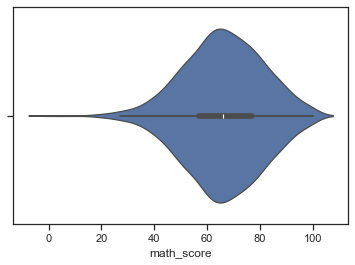

In [40]:
sns.violinplot(x=data['math_score'])

In [31]:
data.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [32]:
data.corr(method='spearman')

,math_score,reading_score,writing_score
math_score,1.000000,0.804064,0.778339
reading_score,0.804064,1.000000,0.948953
writing_score,0.778339,0.948953,1.000000


<AxesSubplot: >

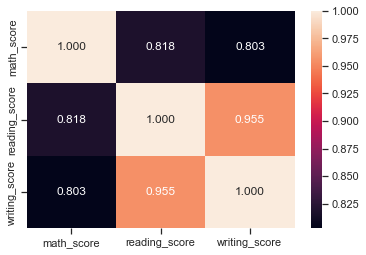

In [34]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')